In [53]:
# pip install datasets

In [92]:
import datasets
import pandas as pd
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk
from numpy import moveaxis
from numpy import asarray
from PIL import Image
import pyarrow as pa
import pyarrow.dataset as ds
from sklearn.model_selection import train_test_split


In [100]:
# !pip install datasets transformers torch

In [126]:
dataset_train = load_dataset(
    '/home/michaelservilla/CS529/Project_3/cifar_10/cifar-10-batches-py', split='train', verification_mode='no_checks')


FileNotFoundError: Unable to resolve any data file that matches '['test[-._ 0-9/]**', '**[-._ 0-9/]test[-._ 0-9/]**', 'testing[-._ 0-9/]**', '**[-._ 0-9/]testing[-._ 0-9/]**', 'eval[-._ 0-9/]**', '**[-._ 0-9/]eval[-._ 0-9/]**', 'evaluation[-._ 0-9/]**', '**[-._ 0-9/]evaluation[-._ 0-9/]**']' at /home/michaelservilla/CS529/Project_3/cifar_10/cifar-10-batches-py with any supported extension ['csv', 'tsv', 'json', 'jsonl', 'parquet', 'txt', 'blp', 'bmp', 'dib', 'bufr', 'cur', 'pcx', 'dcx', 'dds', 'ps', 'eps', 'fit', 'fits', 'fli', 'flc', 'ftc', 'ftu', 'gbr', 'gif', 'grib', 'h5', 'hdf', 'png', 'apng', 'jp2', 'j2k', 'jpc', 'jpf', 'jpx', 'j2c', 'icns', 'ico', 'im', 'iim', 'tif', 'tiff', 'jfif', 'jpe', 'jpg', 'jpeg', 'mpg', 'mpeg', 'msp', 'pcd', 'pxr', 'pbm', 'pgm', 'ppm', 'pnm', 'psd', 'bw', 'rgb', 'rgba', 'sgi', 'ras', 'tga', 'icb', 'vda', 'vst', 'webp', 'wmf', 'emf', 'xbm', 'xpm', 'BLP', 'BMP', 'DIB', 'BUFR', 'CUR', 'PCX', 'DCX', 'DDS', 'PS', 'EPS', 'FIT', 'FITS', 'FLI', 'FLC', 'FTC', 'FTU', 'GBR', 'GIF', 'GRIB', 'H5', 'HDF', 'PNG', 'APNG', 'JP2', 'J2K', 'JPC', 'JPF', 'JPX', 'J2C', 'ICNS', 'ICO', 'IM', 'IIM', 'TIF', 'TIFF', 'JFIF', 'JPE', 'JPG', 'JPEG', 'MPG', 'MPEG', 'MSP', 'PCD', 'PXR', 'PBM', 'PGM', 'PPM', 'PNM', 'PSD', 'BW', 'RGB', 'RGBA', 'SGI', 'RAS', 'TGA', 'ICB', 'VDA', 'VST', 'WEBP', 'WMF', 'EMF', 'XBM', 'XPM', 'aiff', 'au', 'avr', 'caf', 'flac', 'htk', 'svx', 'mat4', 'mat5', 'mpc2k', 'ogg', 'paf', 'pvf', 'raw', 'rf64', 'sd2', 'sds', 'ircam', 'voc', 'w64', 'wav', 'nist', 'wavex', 'wve', 'xi', 'mp3', 'opus', 'AIFF', 'AU', 'AVR', 'CAF', 'FLAC', 'HTK', 'SVX', 'MAT4', 'MAT5', 'MPC2K', 'OGG', 'PAF', 'PVF', 'RAW', 'RF64', 'SD2', 'SDS', 'IRCAM', 'VOC', 'W64', 'WAV', 'NIST', 'WAVEX', 'WVE', 'XI', 'MP3', 'OPUS', 'zip']

In [108]:
# dataset = load_dataset("imagefolder", data_dir="/home/michaelservilla/CS529/Project_3/train", split='train').train_test_split(test_size=0.2)
# dataset_train = dataset['train']
# dataset_test = dataset['test']

Resolving data files:   0%|          | 0/4750 [00:00<?, ?it/s]

Found cached dataset imagefolder (/home/michaelservilla/.cache/huggingface/datasets/imagefolder/default-c1783a327ea508b0/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [109]:
num_classes = len(set(dataset_train['label']))
labels = dataset_train.features['label']
num_classes, labels

(12,
 ClassLabel(names=['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet'], id=None))

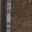

In [112]:
dataset_train[0]['image']

In [113]:
dataset_train[2]['label'], labels.names[dataset_train[2]['label']]

(1, 'Charlock')

In [114]:
from transformers import ViTFeatureExtractor
model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

loading configuration file preprocessor_config.json from cache at /home/michaelservilla/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/7cbdb7ee3a6bcdf99dae654893f66519c480a0f8/preprocessor_config.json
Feature extractor ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}



In [115]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

In [116]:
example = feature_extractor(dataset_train[0]['image'], return_tensors='pt')
example

{'pixel_values': tensor([[[[-0.1608, -0.1608, -0.1608,  ..., -0.3176, -0.3176, -0.3176],
          [-0.1608, -0.1608, -0.1608,  ..., -0.3176, -0.3176, -0.3176],
          [-0.1608, -0.1608, -0.1608,  ..., -0.3176, -0.3176, -0.3176],
          ...,
          [-0.4510, -0.4510, -0.4510,  ..., -0.3412, -0.3412, -0.3412],
          [-0.4510, -0.4510, -0.4510,  ..., -0.3412, -0.3412, -0.3412],
          [-0.4510, -0.4510, -0.4510,  ..., -0.3412, -0.3412, -0.3412]],

         [[-0.1922, -0.1922, -0.1922,  ..., -0.5373, -0.5373, -0.5373],
          [-0.1922, -0.1922, -0.1922,  ..., -0.5373, -0.5373, -0.5373],
          [-0.1922, -0.1922, -0.1922,  ..., -0.5373, -0.5373, -0.5373],
          ...,
          [-0.4980, -0.4980, -0.4980,  ..., -0.4588, -0.4588, -0.4588],
          [-0.4980, -0.4980, -0.4980,  ..., -0.4588, -0.4588, -0.4588],
          [-0.4980, -0.4980, -0.4980,  ..., -0.4588, -0.4588, -0.4588]],

         [[-0.2000, -0.2000, -0.2000,  ..., -0.6706, -0.6706, -0.6706],
          [-0

In [117]:
example['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [118]:
import torch

In [119]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [120]:
def preprocess(batch):
  inputs = feature_extractor(batch['image'], return_tensors='pt')
  inputs['label'] = batch['label']
  return inputs

In [121]:
prepared_train = dataset_train.with_transform(preprocess)
prepared_test = dataset_test.with_transform(preprocess)

In [68]:
# training_subset = {}
# v = 0

# for i in range(dataset_train.shape[0]):

#     try:
#         training_subset[i-v] = prepared_train[i+v]
#     except:
#         print(i)
#         v+=1

# print(training_subset.keys())

In [69]:
# testing_subset = {}
# u = 0

# for i in range(dataset_test.shape[0]):

#     try:
#         testing_subset[i-u] = prepared_test[i]
#     except:
#         print(i)
#         u += 1

# print(testing_subset.keys())


In [70]:
def collate_fn(batch):
  return {'pixel_values':torch.stack([x['pixel_values'] for x in batch]), 'labels':torch.tensor([x['label'] for x in batch])}

In [71]:
import numpy as np
from evaluate import load

from datasets import load_metric

metric = load("accuracy")
def compute_metrics(p):
  return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)
  

In [72]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="/home/michaelservilla/CS529/Project_3/", per_device_train_batch_size=16, evaluation_strategy="steps", num_train_epochs=.2,
                                  save_steps=100, eval_steps=100, logging_steps=10, learning_rate=2e-4, save_total_limit=2, remove_unused_columns=False, push_to_hub=False, load_best_model_at_end=True)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [73]:
from transformers import ViTForImageClassification

labels = dataset_train.features['label'].names

model = ViTForImageClassification.from_pretrained(model_name_or_path, num_labels=len(labels))


loading configuration file config.json from cache at /home/michaelservilla/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/7cbdb7ee3a6bcdf99dae654893f66519c480a0f8/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL

In [74]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

In [75]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args, data_collator=collate_fn, compute_metrics=compute_metrics, train_dataset=prepared_train, eval_dataset=prepared_test, tokenizer=feature_extractor)

In [76]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** Running training *****
  Num examples = 3800
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 48
  Number of trainable parameters = 85807884


  0%|          | 0/48 [00:00<?, ?it/s]

ValueError: operands could not be broadcast together with shapes (4,224,224) (3,) 